# Lesson 4 Assignment - Autodetection of Breast Cancer

## Author - Studentname

### Background
The <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">Breast Cancer Wisconsin (Diagnostic) Data set</a> contains donated data.
These data were obtained from the University of Wisconsin Hospitals, Madison. Donors:
1. Dr. William H. Wolberg, General Surgery Dept.
2. W. Nick Street, Computer Sciences Dept.
3. Olvi L. Mangasarian, Computer Sciences Dept.

They contain the simplified and normalized attributes used to detect breast cancer. Your task is to build
a decision tree classifier that would be able to detect, based on the attributes below, whether a tumor is
benign or malignant.

Attributes:
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitosis
11. Class (4 for malignant, 2 for benign)




## Tasks
Using the provided WI_Breast_Cancer.csv file, build an experiment using a decision tree.

Answer the following questions:
1. Test both entropy and the gini coefficient. Which performs better and why?
2. What are the best hyperparameter settings for both?
3. Visualize both models and see which feature is selected for each criterion. Are they same for
both? Why or why not?
4. Determine the AUC for the best model you can achieve. What are the precision and recal values
and which might be the one you want to maximize?
5. What are the implications of using this type of machine learning algorithm for breast cancer
analysis?


In [1]:
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/WI_Breast_Cancer.csv"
colnames = ['Sample_code' , 'Class', 'Clump_thick', 'Uni_cell_sz', 'Uni_cell_shp', 'Marg_adhes', 
             'Single_cell_sz', 'Bare_Nucl', 'Bland_Chr', 'Norm_Nucl', 'Mitosis']

In [2]:
# Import libraries
import pandas as pd 
cancer_data = pd.read_csv(URL, names = colnames, header = None)
print(cancer_data.head())
print(cancer_data.info())
print(cancer_data.describe())

  Sample_code Class  Clump_thick  Uni_cell_sz  Uni_cell_shp  Marg_adhes  \
0     1000025     2          5.0          1.0           1.0         1.0   
1     1002945     2          5.0          4.0           4.0         5.0   
2     1015425     2          3.0          1.0           1.0         1.0   
3     1016277     2          6.0          8.0           8.0         1.0   
4     1017023     2          4.0          1.0           1.0         3.0   

   Single_cell_sz  Bare_Nucl  Bland_Chr  Norm_Nucl Mitosis  
0             2.0        1.0        3.0        1.0       1  
1             7.0       10.0        3.0        2.0       1  
2             2.0        2.0        3.0        1.0       1  
3             3.0        4.0        3.0        7.0       1  
4             2.0        1.0        3.0        1.0       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 11 columns):
Sample_code       709 non-null object
Class             702 non-null object
Cl

## Drop sample code
### Drop NA
### Convert Mitosis to integer

In [3]:
cancer_data = cancer_data.dropna() 
results = cancer_data['Class'].astype(str).astype(int)
cancer_data = cancer_data.drop(['Class','Sample_code'], axis = 1)
print(cancer_data.describe())
print(cancer_data['Mitosis'].value_counts())

       Clump_thick  Uni_cell_sz  Uni_cell_shp  Marg_adhes  Single_cell_sz  \
count   701.000000   701.000000     701.00000  701.000000      701.000000   
mean      4.433666     3.154066       3.21826    2.813124        3.226819   
std       2.827459     3.069053       2.97456    2.858201        2.220340   
min       1.000000     1.000000       1.00000    1.000000        1.000000   
25%       2.000000     1.000000       1.00000    1.000000        2.000000   
50%       4.000000     1.000000       1.00000    1.000000        2.000000   
75%       6.000000     5.000000       5.00000    4.000000        4.000000   
max      10.000000    10.000000      10.00000   10.000000       10.000000   

        Bare_Nucl   Bland_Chr   Norm_Nucl  
count  701.000000  701.000000  701.000000  
mean     3.456491    3.447932    2.877318  
std      3.637881    2.447550    3.061150  
min      0.000000    1.000000    1.000000  
25%      1.000000    2.000000    1.000000  
50%      1.000000    3.000000    1.000000 

## Change weird Mitosis input to a 3
Seems the most reasonable thing to do

In [4]:

##s = cancer_data.loc[(cancer_data['Mitosis'] == "3) <-----Reappears in Group 8 as:")]
##print(s.value_counts())
cancer_data['Mitosis'] = cancer_data['Mitosis'].replace( to_replace= ['r'], value = 3, regex=True)
##cancer_data = cancer_data['Mitosis'].astype(str).astype(int)
print(cancer_data['Mitosis'].value_counts()) 
results = results.map({2 : 0, 4 : 1})
print(results.value_counts())

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
3       1
3       1
Name: Mitosis, dtype: int64
0    458
1    243
Name: Class, dtype: int64


## Now run both types of decision trees

In [50]:
from sklearn.model_selection import train_test_split
# Ensure the decision tree is deterministic
import numpy as np
np.random.seed(101)

## split into test and training sets

X_train, X_test, y_train, y_test = train_test_split(cancer_data, results, test_size = 0.25, random_state=1)


from sklearn.tree import DecisionTreeClassifier 

# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy', random_state = 101).fit(X_train, y_train) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 2
model_gini = DecisionTreeClassifier(min_samples_leaf=2, random_state = 101).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

# NOTE: You should, when testing models, only vary 1 thing at a time. 

## generate the accuracy scores

In [51]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
misclassified_ent_points = (y_test != y_ent_pred).sum()
misclassified_gini_points = (y_test != y_gini_pred).sum()
##print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
##print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))
print("Variables are\n", list(X_train))
print("Number of mislabeled Entropy points out of a total %d points : %d"\
      % (X_test.shape[0], misclassified_ent_points))
print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(y_test, y_ent_pred)
print("entropy false positive rate:", fpr)
print("entropy true positive rate:", tpr)
print("Entropy AUC = %.3f"%(auc(fpr, tpr)))
print("Number of mislabeled Entropy points out of a total %d points : %d"\
      % (X_test.shape[0], misclassified_ent_points))
print("Gini Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_gini_points))/y_test.shape[0]*100,2)))
fpr, tpr, threshold = roc_curve(y_test, y_gini_pred)
print("Gini false positive rate", fpr)
print("Gini true positive rate:", tpr)
print("Gini AUC = %.3f"%(auc(fpr, tpr)))

Variables are
 ['Clump_thick', 'Uni_cell_sz', 'Uni_cell_shp', 'Marg_adhes', 'Single_cell_sz', 'Bare_Nucl', 'Bland_Chr', 'Norm_Nucl', 'Mitosis']
Number of mislabeled Entropy points out of a total 176 points : 7
Entropy Accuracy = 96.02
entropy false positive rate: [0.         0.02542373 1.        ]
entropy true positive rate: [0.         0.93103448 1.        ]
Entropy AUC = 0.953
Number of mislabeled Entropy points out of a total 176 points : 7
Gini Accuracy = 92.61
Gini false positive rate [0.         0.04237288 1.        ]
Gini true positive rate: [0.         0.86206897 1.        ]
Gini AUC = 0.910


## Let's look at the confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix
print("gini confusion matrix\n")
pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns=['Predicted benign', 'Predicted malignant'],
    index=['True benign', 'True malignant']
)

gini confusion matrix



,Predicted benign,Predicted malignant
True benign,114,4
True malignant,8,50


In [8]:
print("entropy confusion matrix\n")
pd.DataFrame(
    confusion_matrix(y_test, y_ent_pred),
    columns=['Predicted benign', 'Predicted malignant'],
    index=['True benign', 'True malignant']
)

entropy confusion matrix



,Predicted benign,Predicted malignant
True benign,115,3
True malignant,4,54


In [9]:
# Ensure the decision tree is deterministic
import numpy as np
np.random.seed(101)

In [10]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
from sklearn import tree
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile, feature_names = colnames[0:9])
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree.dot -o dtree.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

0

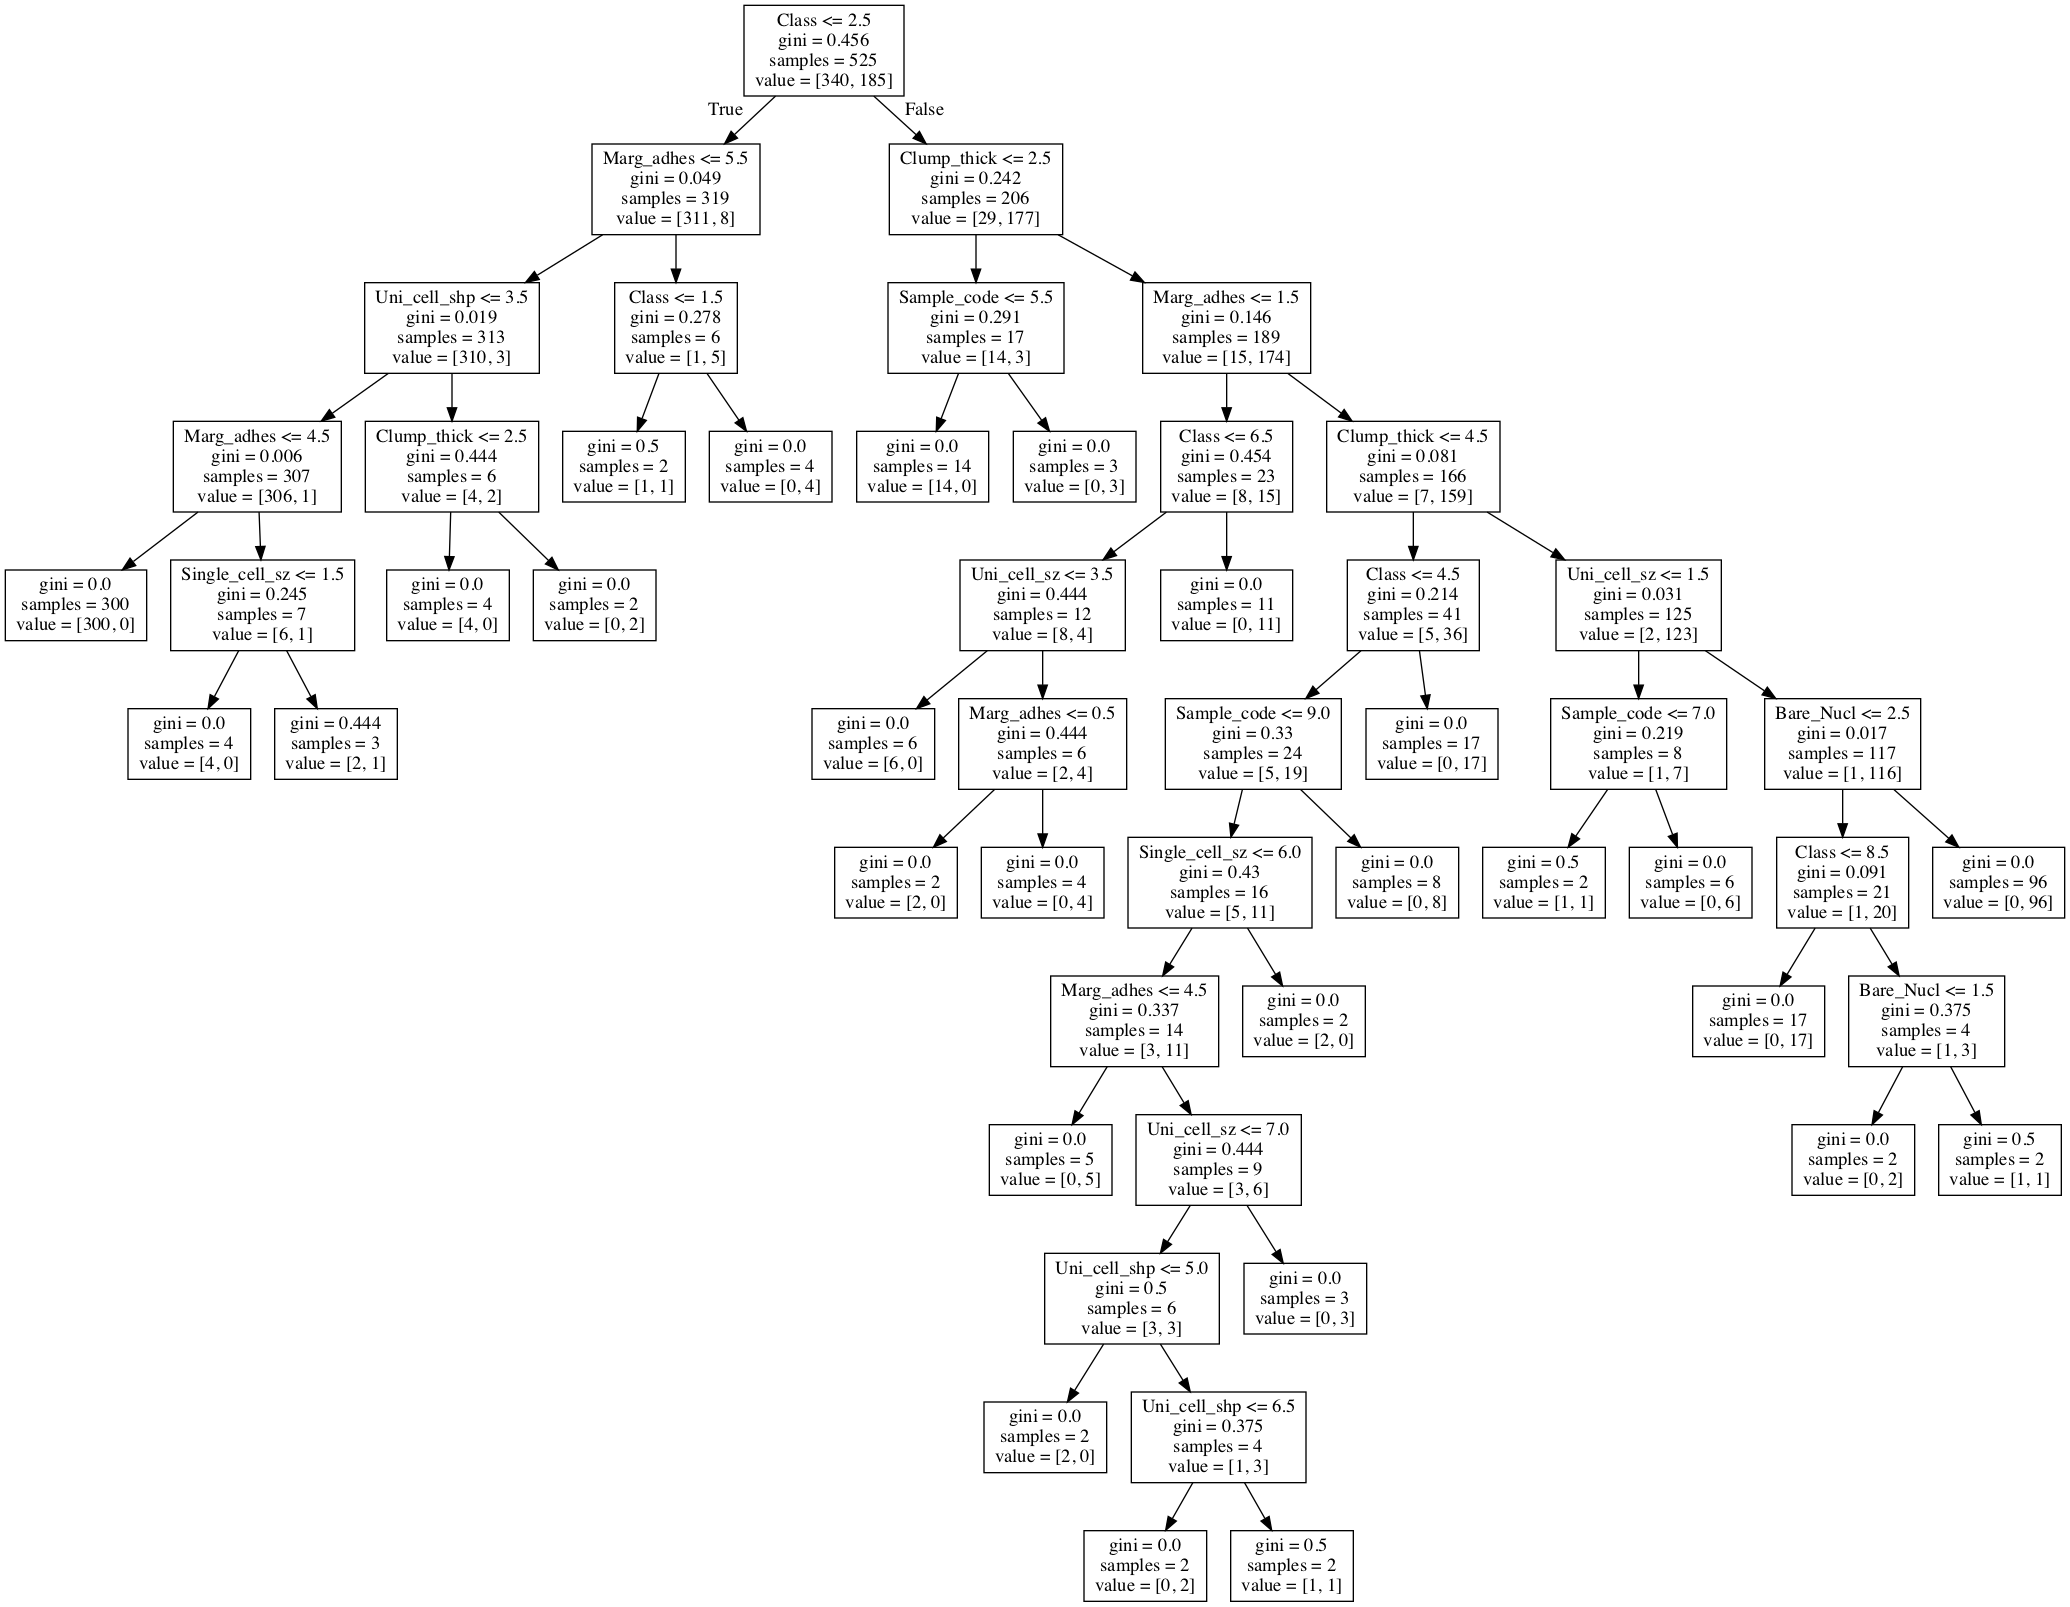

In [80]:
# show the png
from IPython.display import Image
Image(filename='dtree.png', width=1000, height=1000) 

In [81]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
from sklearn import tree
dotfile = open("dtree.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile, feature_names = colnames[0:9])
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree.dot -o dtree.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

0

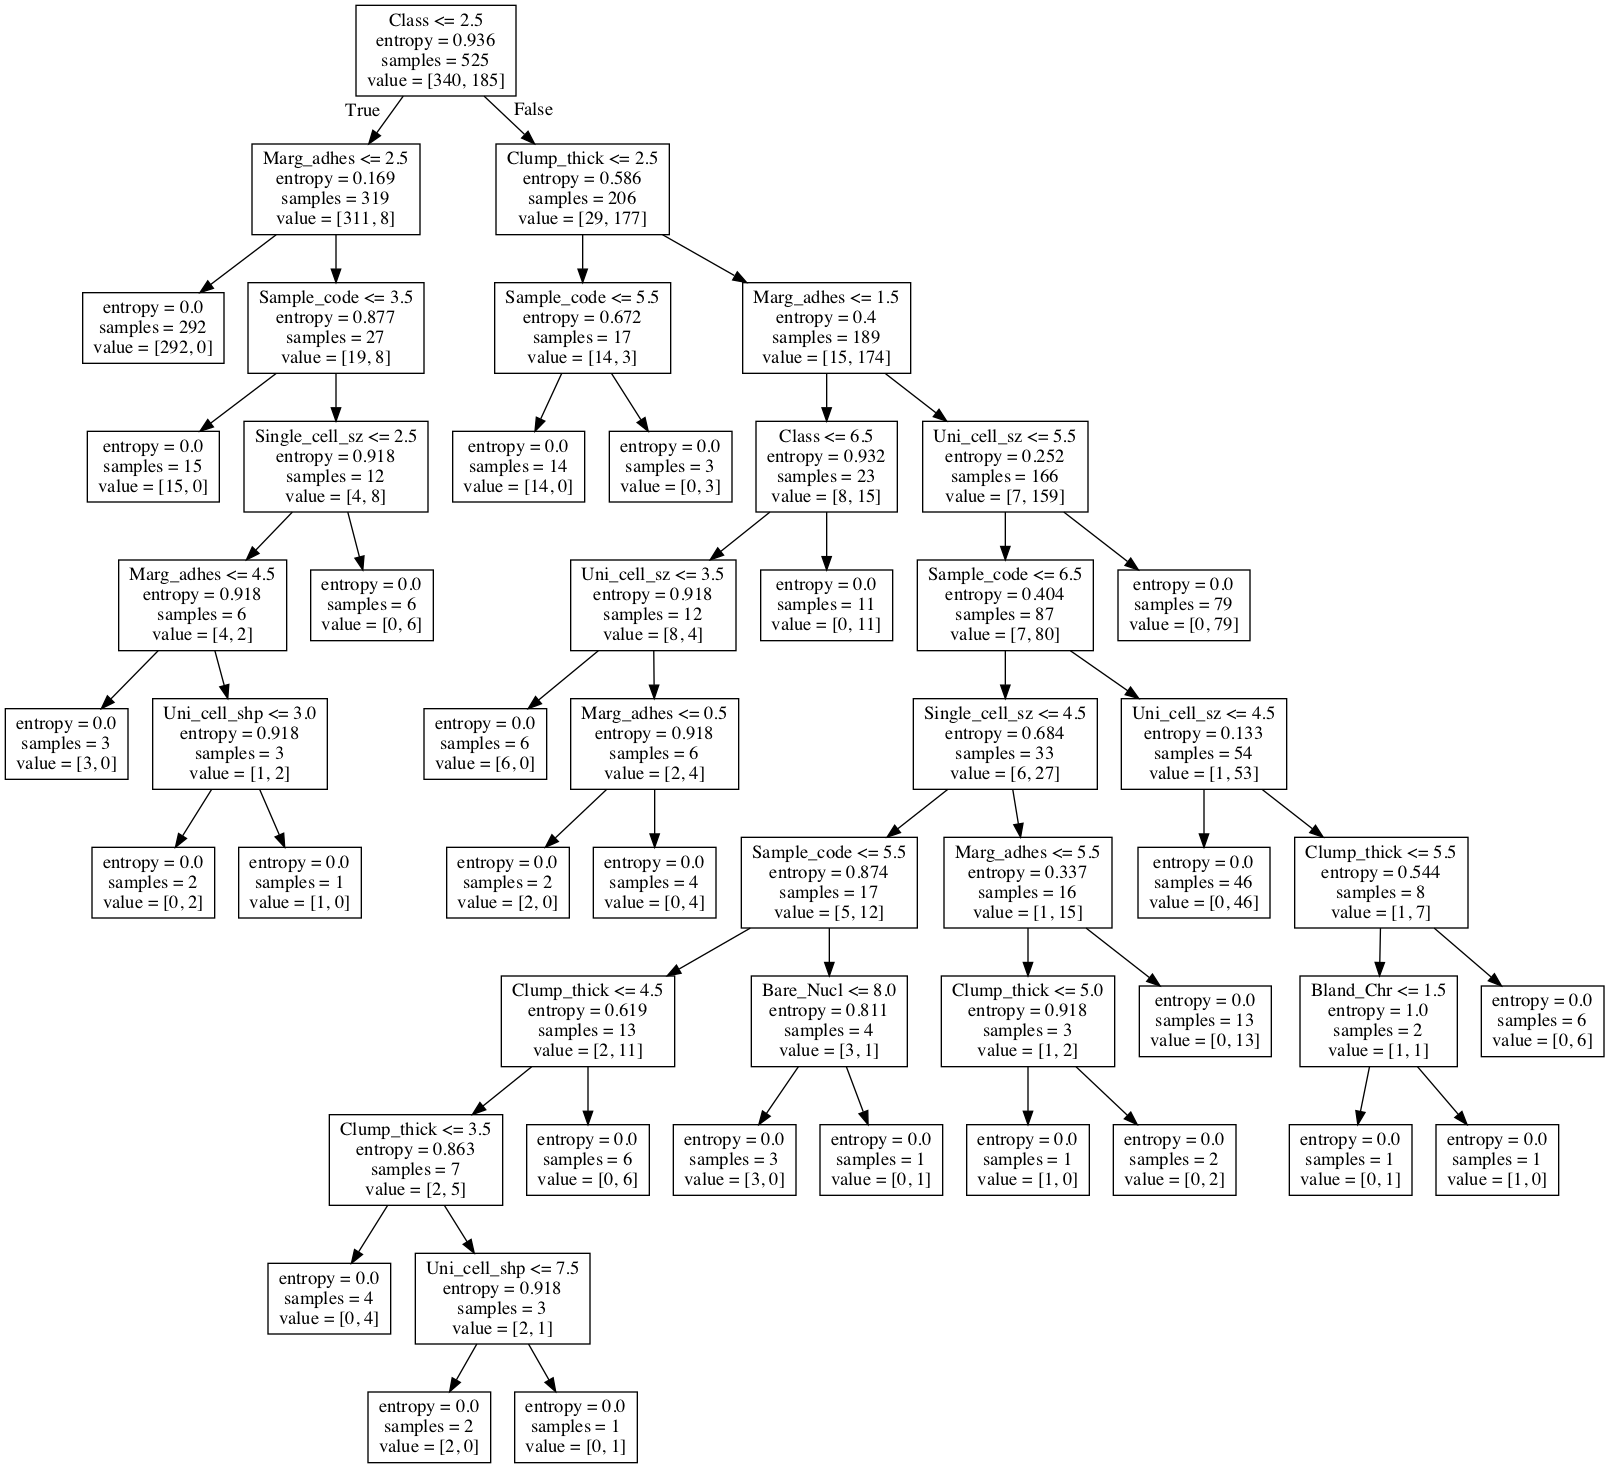

In [82]:
# show the png
from IPython.display import Image
Image(filename='dtree.png', width=1000, height=1000) 

Now let's try to tune some hyperparameters of the entropy model

In [52]:

def jo_jo(p_max):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_curve, auc
    best_acc = 90
    best_AUC = 0.5
    for p in range(2, p_max + 1):
        model_ent = DecisionTreeClassifier(max_depth = p, criterion='entropy', random_state = 101).fit(X_train, y_train) 
        y_ent_pred = model_ent.predict(X_test)
        misclassified_ent_points = (y_test != y_ent_pred).sum()
        fpr, tpr, threshold = roc_curve(y_test, y_ent_pred)
        accur = accuracy_score(y_test, y_ent_pred)*100
        acc_AUC = auc(fpr,tpr)
        print("Entropy accuracy is : {}%".format(accur))  
        print("Max depth", p)
        ##print("Number of mislabeled Entropy points out of a total %d points : %d"\
        ##      % (X_test.shape[0], misclassified_ent_points))
        ##print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
        ##print("entropy false positive rate:", fpr)
        ##print("entropy true positive rate:", tpr)
        print("Entropy AUC = %.3f"% acc_AUC)
        if(accur > best_acc):
            best_model = p
            best_acc = accur
            best_AUC = acc_AUC
        else:
            best_acc = best_acc
    return(best_model, best_acc, best_AUC)
best_model, best_acc, best_AUC = jo_jo(20)   
print('***************************************')
print('Max Depth hyperparameter = ' + str(best_model) + ' and with accuracy '+ str(best_acc) + ' and best AUC is ' +str(best_AUC))




Entropy accuracy is : 92.04545454545455%
Max depth 2
Entropy AUC = 0.914
Entropy accuracy is : 94.31818181818183%
Max depth 3
Entropy AUC = 0.949
Entropy accuracy is : 94.88636363636364%
Max depth 4
Entropy AUC = 0.944
Entropy accuracy is : 95.45454545454545%
Max depth 5
Entropy AUC = 0.953
Entropy accuracy is : 95.45454545454545%
Max depth 6
Entropy AUC = 0.953
Entropy accuracy is : 94.31818181818183%
Max depth 7
Entropy AUC = 0.936
Entropy accuracy is : 96.02272727272727%
Max depth 8
Entropy AUC = 0.957
Entropy accuracy is : 96.02272727272727%
Max depth 9
Entropy AUC = 0.953
Entropy accuracy is : 96.02272727272727%
Max depth 10
Entropy AUC = 0.953
Entropy accuracy is : 96.02272727272727%
Max depth 11
Entropy AUC = 0.953
Entropy accuracy is : 96.02272727272727%
Max depth 12
Entropy AUC = 0.953
Entropy accuracy is : 96.02272727272727%
Max depth 13
Entropy AUC = 0.953
Entropy accuracy is : 96.02272727272727%
Max depth 14
Entropy AUC = 0.953
Entropy accuracy is : 96.02272727272727%
Max d

## For max depth,  The best accurracy is 96.02 and the best AUC is .957 for a depth of 8 for the entropy model

## Let's look at the min_samples_split

In [58]:
def gi_gi(p_max):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_curve, auc
    best_acc = 90
    best_AUC = 0.5
    for p in range(2, p_max + 1):
        model_ent = DecisionTreeClassifier(max_depth = 8, criterion='entropy', random_state = 101, min_samples_split = p).fit(X_train, y_train) 
        y_ent_pred = model_ent.predict(X_test)
        misclassified_ent_points = (y_test != y_ent_pred).sum()
        fpr, tpr, threshold = roc_curve(y_test, y_ent_pred)
        accur = accuracy_score(y_test, y_ent_pred)*100
        acc_AUC = auc(fpr,tpr)
        print("Entropy accuracy is : {}%".format(accur))  
        print("min samples", p)
        ##print("Number of mislabeled Entropy points out of a total %d points : %d"\
        ##      % (X_test.shape[0], misclassified_ent_points))
        ##print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
        ##print("entropy false positive rate:", fpr)
        ##print("entropy true positive rate:", tpr)
        print("Entropy AUC = %.3f"% acc_AUC)
        if(accur > best_acc):
            min_samples = p
            best_acc = accur
            best_AUC = acc_AUC
        else:
            best_acc = best_acc
    return(min_samples, best_acc, best_AUC)
min_samples, best_acc, best_AUC = gi_gi(8)   
print('***************************************')
print('Min Samples to split hyperparameter = ' + str(min_samples) + ' and with accuracy '+ str(best_acc) + ' and best AUC is ' +str(best_AUC))




Entropy accuracy is : 96.02272727272727%
min samples 2
Entropy AUC = 0.957
Entropy accuracy is : 94.88636363636364%
min samples 3
Entropy AUC = 0.940
Entropy accuracy is : 94.31818181818183%
min samples 4
Entropy AUC = 0.936
Entropy accuracy is : 94.31818181818183%
min samples 5
Entropy AUC = 0.936
Entropy accuracy is : 94.31818181818183%
min samples 6
Entropy AUC = 0.936
Entropy accuracy is : 94.31818181818183%
min samples 7
Entropy AUC = 0.936
Entropy accuracy is : 94.31818181818183%
min samples 8
Entropy AUC = 0.936
***************************************
Min Samples to split hyperparameter = 2 and with accuracy 96.02272727272727 and best AUC is 0.9571887784921099


## Looks like a best minimum split is 2, no improvement upon accuracy
### Let's look at the min samples for a leaf, and see if we can optimize AUC

In [57]:
def fi_fi(p_max):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_curve, auc
    best_acc = 90
    best_AUC = 0.5
    for p in range(1, p_max + 1):
        model_ent = DecisionTreeClassifier(max_depth = 8, criterion='entropy', random_state = 101, min_samples_split = 2, 
                                          min_samples_leaf = p).fit(X_train, y_train) 
        y_ent_pred = model_ent.predict(X_test)
        misclassified_ent_points = (y_test != y_ent_pred).sum()
        fpr, tpr, threshold = roc_curve(y_test, y_ent_pred)
        accur = accuracy_score(y_test, y_ent_pred)*100
        acc_AUC = auc(fpr,tpr)
        print("Entropy accuracy is : {}%".format(accur))  
        print("min samples", p)
        ##print("Number of mislabeled Entropy points out of a total %d points : %d"\
        ##      % (X_test.shape[0], misclassified_ent_points))
        ##print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
        ##print("entropy false positive rate:", fpr)
        ##print("entropy true positive rate:", tpr)
        print("Entropy AUC = %.3f"% acc_AUC)
        if(acc_AUC > best_AUC):
            min_samples = p
            best_acc = accur
            best_AUC = acc_AUC
        else:
            best_acc = best_acc
    return(min_samples, best_acc, best_AUC)
min_samples, best_acc, best_AUC = fi_fi(5)   
print('***************************************')
print('Min Samples for a leaf hyperparameter = ' + str(min_samples) + ' and with accuracy '+ str(best_acc) + ' and best AUC is ' +str(best_AUC))



Entropy accuracy is : 96.02272727272727%
min samples 1
Entropy AUC = 0.957
Entropy accuracy is : 94.31818181818183%
min samples 2
Entropy AUC = 0.936
Entropy accuracy is : 94.88636363636364%
min samples 3
Entropy AUC = 0.944
Entropy accuracy is : 96.02272727272727%
min samples 4
Entropy AUC = 0.962
Entropy accuracy is : 96.02272727272727%
min samples 5
Entropy AUC = 0.962
***************************************
Min Samples for a leaf hyperparameter = 4 and with accuracy 96.02272727272727 and best AUC is 0.9615721800116892



## So for Entropy, the best accuracy and AUC occur with a Max Depth of 8, a minimum samples to split of 2, and a minimum samples for leaf of 4

## Now, let's look at Gini

In [59]:
def ao_ao(p_max):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_curve, auc
    best_acc = 90
    best_AUC = 0.5
    for p in range(2, p_max + 1):
        model_gini = DecisionTreeClassifier(max_depth = p, min_samples_leaf=2, random_state = 101).fit(X_train, y_train)
        y_gini_pred = model_gini.predict(X_test)
        misclassified_gini_points = (y_test != y_gini_pred).sum()
        fpr, tpr, threshold = roc_curve(y_test, y_gini_pred)
        accur = accuracy_score(y_test, y_gini_pred)*100
        acc_AUC = auc(fpr,tpr)
        print("Gini accuracy is : {}%".format(accur))  
        print("Max depth", p)
        ##print("Number of mislabeled Entropy points out of a total %d points : %d"\
        ##      % (X_test.shape[0], misclassified_ent_points))
        ##print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
        ##print("entropy false positive rate:", fpr)
        ##print("entropy true positive rate:", tpr)
        print("Gini AUC = %.3f"% acc_AUC)
        if(accur > best_acc):
            best_model = p
            best_acc = accur
            best_AUC = acc_AUC
        else:
            best_acc = best_acc
    return(best_model, best_acc, best_AUC)
best_model, best_acc, best_AUC = ao_ao(20)   
print('***************************************')
print('Max Depth hyperparameter = ' + str(best_model) + ' and with accuracy '+ str(best_acc) + ' and best AUC is ' +str(best_AUC))




Gini accuracy is : 93.18181818181817%
Max depth 2
Gini AUC = 0.932
Gini accuracy is : 93.18181818181817%
Max depth 3
Gini AUC = 0.932
Gini accuracy is : 94.31818181818183%
Max depth 4
Gini AUC = 0.940
Gini accuracy is : 95.45454545454545%
Max depth 5
Gini AUC = 0.953
Gini accuracy is : 93.75%
Max depth 6
Gini AUC = 0.927
Gini accuracy is : 93.75%
Max depth 7
Gini AUC = 0.927
Gini accuracy is : 95.45454545454545%
Max depth 8
Gini AUC = 0.949
Gini accuracy is : 93.75%
Max depth 9
Gini AUC = 0.923
Gini accuracy is : 92.61363636363636%
Max depth 10
Gini AUC = 0.910
Gini accuracy is : 92.61363636363636%
Max depth 11
Gini AUC = 0.910
Gini accuracy is : 92.61363636363636%
Max depth 12
Gini AUC = 0.910
Gini accuracy is : 92.61363636363636%
Max depth 13
Gini AUC = 0.910
Gini accuracy is : 92.61363636363636%
Max depth 14
Gini AUC = 0.910
Gini accuracy is : 92.61363636363636%
Max depth 15
Gini AUC = 0.910
Gini accuracy is : 92.61363636363636%
Max depth 16
Gini AUC = 0.910
Gini accuracy is : 92.61

## The best accuracy is with the max depth hyperparameter at 5. 

### Let's look at the min_samples_split to optimize

In [60]:
def bo_bo(p_max):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_curve, auc
    best_acc = 90
    best_AUC = 0.5
    for p in range(2, p_max + 1):
        model_gini = DecisionTreeClassifier(max_depth = 5, min_samples_split = p, min_samples_leaf=2, random_state = 101).fit(X_train, y_train)
        y_gini_pred = model_gini.predict(X_test)
        misclassified_gini_points = (y_test != y_gini_pred).sum()
        fpr, tpr, threshold = roc_curve(y_test, y_gini_pred)
        accur = accuracy_score(y_test, y_gini_pred)*100
        acc_AUC = auc(fpr,tpr)
        print("Gini accuracy is : {}%".format(accur))  
        print("Min Samples Split", p)
        ##print("Number of mislabeled Entropy points out of a total %d points : %d"\
        ##      % (X_test.shape[0], misclassified_ent_points))
        ##print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
        ##print("entropy false positive rate:", fpr)
        ##print("entropy true positive rate:", tpr)
        print("Gini AUC = %.3f"% acc_AUC)
        if(accur > best_acc):
            best_model = p
            best_acc = accur
            best_AUC = acc_AUC
        else:
            best_acc = best_acc
    return(best_model, best_acc, best_AUC)
best_split, best_acc, best_AUC = bo_bo(9)   
print('***************************************')
print('Min samples split hyperparameter = ' + str(best_split) + ' and with accuracy '+ str(best_acc) + ' and best AUC is ' +str(best_AUC))



Gini accuracy is : 95.45454545454545%
Min Samples Split 2
Gini AUC = 0.953
Gini accuracy is : 95.45454545454545%
Min Samples Split 3
Gini AUC = 0.953
Gini accuracy is : 95.45454545454545%
Min Samples Split 4
Gini AUC = 0.953
Gini accuracy is : 95.45454545454545%
Min Samples Split 5
Gini AUC = 0.953
Gini accuracy is : 95.45454545454545%
Min Samples Split 6
Gini AUC = 0.953
Gini accuracy is : 94.88636363636364%
Min Samples Split 7
Gini AUC = 0.944
Gini accuracy is : 94.88636363636364%
Min Samples Split 8
Gini AUC = 0.944
Gini accuracy is : 94.88636363636364%
Min Samples Split 9
Gini AUC = 0.944
***************************************
Min samples split hyperparameter = 2 and with accuracy 95.45454545454545 and best AUC is 0.9529514903565166


## The min samples split is best at 2, with accuracy of 95.5% and AUC of 0.953

## Let's see what improvements can be made with min_samples_leaf...

In [63]:
def co_co(p_max):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_curve, auc
    best_acc = 90
    best_AUC = 0.5
    for p in range(2, p_max + 1):
        model_gini = DecisionTreeClassifier(max_depth = 5, min_samples_split = 2, min_samples_leaf = p, random_state = 101).fit(X_train, y_train)
        y_gini_pred = model_gini.predict(X_test)
        y_gini_pred = model_gini.predict(X_test)
        misclassified_gini_points = (y_test != y_gini_pred).sum()
        fpr, tpr, threshold = roc_curve(y_test, y_gini_pred)
        accur = accuracy_score(y_test, y_gini_pred)*100
        acc_AUC = auc(fpr,tpr)
        print("Gini accuracy is : {}%".format(accur))  
        print("Max depth", p)
        ##print("Number of mislabeled Entropy points out of a total %d points : %d"\
        ##      % (X_test.shape[0], misclassified_ent_points))
        ##print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
        ##print("entropy false positive rate:", fpr)
        ##print("entropy true positive rate:", tpr)
        print("Gini AUC = %.3f"% acc_AUC)
        if(acc_AUC > best_AUC):
            best_samples = p
            best_acc = accur
            best_AUC = acc_AUC
        else:
            best_acc = best_acc
    return(best_samples, best_acc, best_AUC)
best_samples, best_acc, best_AUC = co_co(10)   
print('***************************************')
print('Min samples per leaf hyperparameter = ' + str(best_samples) + ' and with accuracy '+ str(best_acc) + ' and best AUC is ' +str(best_AUC))



Gini accuracy is : 95.45454545454545%
Max depth 2
Gini AUC = 0.953
Gini accuracy is : 95.45454545454545%
Max depth 3
Gini AUC = 0.953
Gini accuracy is : 95.45454545454545%
Max depth 4
Gini AUC = 0.953
Gini accuracy is : 95.45454545454545%
Max depth 5
Gini AUC = 0.953
Gini accuracy is : 94.31818181818183%
Max depth 6
Gini AUC = 0.936
Gini accuracy is : 93.75%
Max depth 7
Gini AUC = 0.927
Gini accuracy is : 92.61363636363636%
Max depth 8
Gini AUC = 0.910
Gini accuracy is : 92.61363636363636%
Max depth 9
Gini AUC = 0.910
Gini accuracy is : 92.61363636363636%
Max depth 10
Gini AUC = 0.910
***************************************
Min samples per leaf hyperparameter = 2 and with accuracy 95.45454545454545 and best AUC is 0.9529514903565166


## The entropy model has the best accuracy and AUC occur with a Max Depth of 8, a minimum samples to split of 2, and a minimum samples for leaf of 4:

### Accuracy of 96.02% and AUC of 0.962


# Now we will visualize both models

First Gini

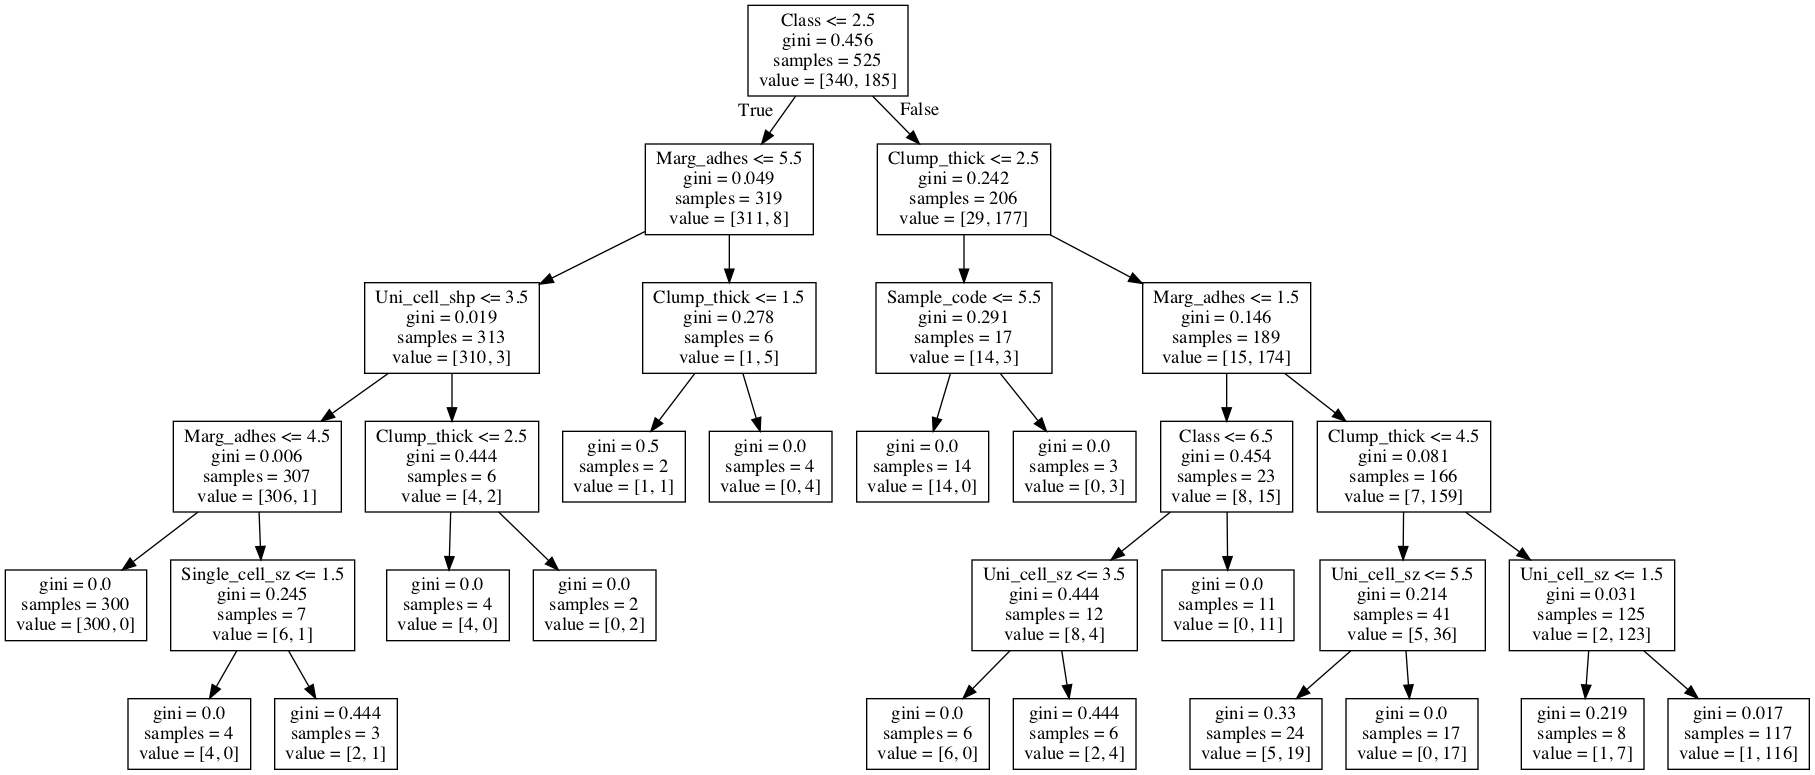

In [65]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
from sklearn import tree
dotfile = open("dtree.dot", 'w')
## do the gini classification with the best parameters
model_gini = DecisionTreeClassifier(max_depth = 5, min_samples_split = 2, min_samples_leaf = 2, random_state = 101).fit(X_train, y_train)
tree.export_graphviz(model_gini, out_file = dotfile, feature_names = colnames[0:9])
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree.dot -o dtree.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

# show the png
from IPython.display import Image
Image(filename='dtree.png', width=1000, height=1000) 

## This is a flatter tree than the one with the defaults

## Now for the Entropy Tree with maximal hyperparameters


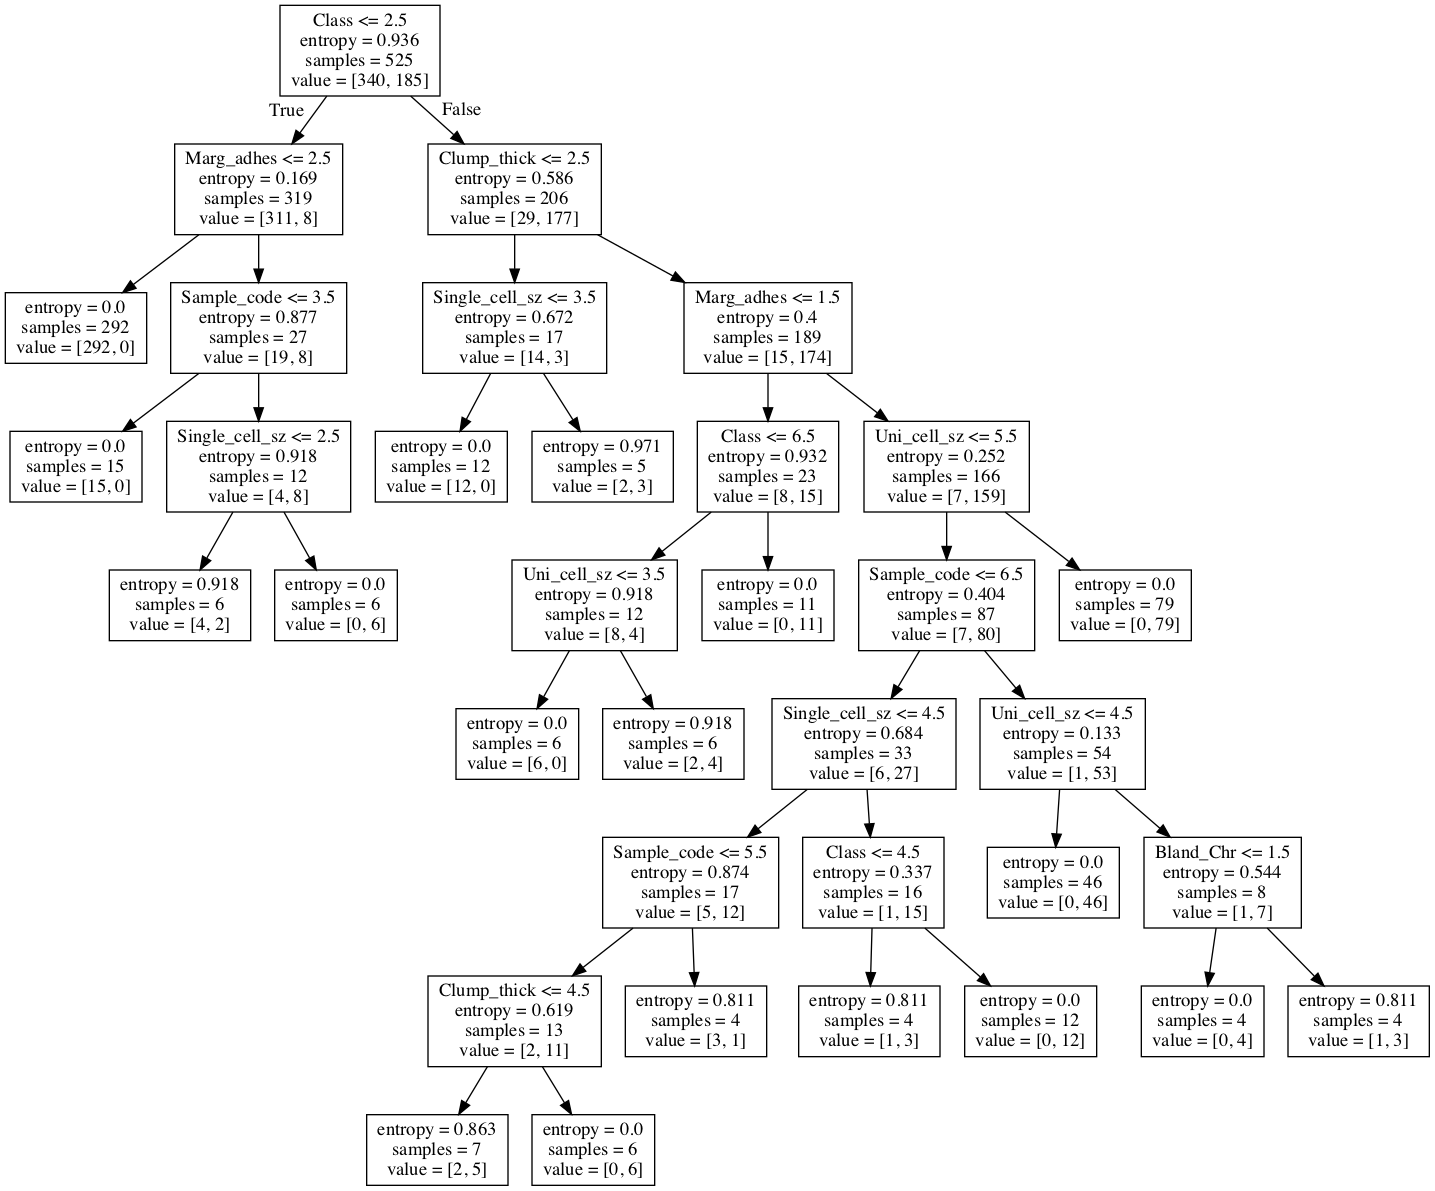

In [79]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
from sklearn import tree
dotfile = open("dtree.dot", 'w')
## do the gini classification with the best parameters
model_ent = DecisionTreeClassifier(max_depth = 8, criterion='entropy', random_state = 101, min_samples_split = 2, 
                                          min_samples_leaf = 4).fit(X_train, y_train)
y_ent_pred = model_ent.predict(X_test)
misclassified_ent_points = (y_test != y_ent_pred).sum()
fpr, tpr, threshold = roc_curve(y_test, y_ent_pred)
accur = accuracy_score(y_test, y_ent_pred)*100
acc_AUC = auc(fpr,tpr)
tree.export_graphviz(model_ent, out_file = dotfile, feature_names = colnames[0:9])
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree.dot -o dtree.png")

# Convert the dot file to a png
#from subprocess import check_call
#check_call(['dot','-Tpng','dtree.dot','-o','dtree.png'])

# show the png
from IPython.display import Image
Image(filename='dtree.png', width=1000, height=1000) 

In [84]:
from sklearn.metrics import average_precision_score
print("precision:", average_precision_score(y_test, y_ent_pred))
print("Entropy accuracy is : {}%".format(accur))  
print("Number of mislabeled Entropy points out of a total %d points : %d"\
      % (X_test.shape[0], misclassified_ent_points))
##print("Entropy Accuracy = %.2f"%(round((y_test.shape[0] - float(misclassified_ent_points))/y_test.shape[0]*100,2)))
print("entropy false positive rate:", fpr)
print("entropy true positive rate:", tpr)
acc_AUC = auc(fpr,tpr)
print("entropy AUC:", acc_AUC)
print("entropy confusion matrix\n")
pd.DataFrame(
    confusion_matrix(y_test, y_ent_pred),
    columns=['Predicted benign', 'Predicted malignant'],
    index=['True benign', 'True malignant']
)

precision: 0.8977401202528393
Entropy accuracy is : 96.02272727272727%
Number of mislabeled Entropy points out of a total 176 points : 7
entropy false positive rate: [0.         0.04237288 1.        ]
entropy true positive rate: [0.         0.96551724 1.        ]
entropy AUC: 0.9615721800116892
entropy confusion matrix



,Predicted benign,Predicted malignant
True benign,113,5
True malignant,2,56


## The first two branches between Entropy and Gini are similar.

## The implications for predicting breast cancer with this sort of machine learning is that diagnosticians can have a classification tree to help them sort patients into the proper diagnosis.

## We would want to minimize the true malignant tumors that were classified as benign.